### 

## Do not run this notebook!

This notebook was used to generate the three road networks that will be
used as input for tests:

    - walk_network_MAIN.graphml
    - drive_network_MAIN.graphml
    - bike_network_MAIN.graphml

**These three road networks should not change so the tests remain
reproducible.** 

Please make subraphs or copies for the tests you need, but 
don't modify the MAIN networks. 

The notebook is temporarily here for documentation purposes only.


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import random

print(f"""OSMnx version: {ox.__version__}""")

f"""NetworkX version: {nx.__version__}"""

OSMnx version: 1.2.3


'NetworkX version: 3.2.1'

### Specify place: city of Alameda in the U.S.

Chosen as it was an example in the osmnx documentation

In [4]:
alameda = {
    "city": "Alameda",
    "county": "Alameda County",
    "state": "California",
    "country": "USA",
}

## Walk network

### Download actual walking road network for Alameda on December 2024

In [5]:
G_full_walk_network = ox.graph_from_place(alameda, network_type="walk")

type(G_full_walk_network)

networkx.classes.multidigraph.MultiDiGraph

In [6]:
f"""As of December 2024, Alameda city's walking road network has {G_full_walk_network.number_of_nodes()} nodes and {G_full_walk_network.number_of_edges()} edges"""

"As of December 2024, Alameda city's walking road network has 7373 nodes and 21176 edges"

That's still too large for our purposes. Let's choose a subgraph

In [7]:
# Fix a seed to get reproducible results
random.seed(42)

# choose a random node
walk_ego_node = random.choice(list(G_full_walk_network.nodes))

walk_ego_node == 5909483625

True

### Getting a subgraph

In [8]:
# Get the subgraph of G that contains the ego_node and up to 3 nodes away from it. Includes edges

walk_network = nx.ego_graph(G_full_walk_network, walk_ego_node, radius=3)

f"""This subgraph has {walk_network.number_of_nodes()} nodes and {walk_network.number_of_edges()} edges"""

'This subgraph has 9 nodes and 18 edges'

In [9]:
walk_network.nodes[walk_ego_node]

{'y': 37.7687576, 'x': -122.231243, 'street_count': 1}

### Visualization

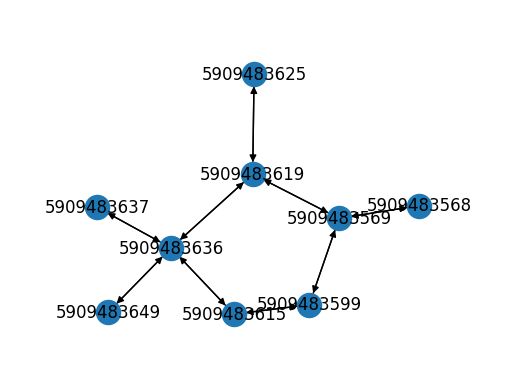

In [10]:
nx.draw_networkx(walk_network)

# Set margins for the axes so nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


### Save network as a graphml file

In [12]:
# This notebook is in the test_data folder because it makes logical
# sense as it is used to create test_data. Plus, it simplifies the filepath

filepath_walk_network = "walk_network_MAIN.graphml"

ox.save_graphml(walk_network, filepath_walk_network)

### Verify

Function nx.graphs_equal exists in nx 3.4.2, but we're behind. Doing 
some checks instead


In [13]:
saved_walk_network = ox.load_graphml(filepath_walk_network)


In [14]:
# Nodes (including data) coincide

walk_network.nodes(data=True) == saved_walk_network.nodes(data=True)

True

In [15]:
# Edges (including data) coincide

list(walk_network.edges(data=True)) == list(saved_walk_network.edges(data=True))

True

## Drive network

In [17]:
G_full_drive_network = ox.graph_from_place(alameda, network_type="drive")

f"""As of December 2024, Alameda city's drive road network has {G_full_drive_network.number_of_nodes()} nodes and {G_full_drive_network.number_of_edges()} edges"""


"As of December 2024, Alameda city's drive road network has 1863 nodes and 4935 edges"

In [25]:
# choose a random node

random.seed(42)

drive_ego_node = random.choice(list(G_full_drive_network.nodes))

drive_ego_node == 261267195

True

In [35]:
# Get the subgraph that contains the ego_node and up to 3 nodes away from it. Includes edges

drive_network = nx.ego_graph(G_full_drive_network, drive_ego_node, radius=3)

f"""This subgraph has {drive_network.number_of_nodes()} nodes and {drive_network.number_of_edges()} edges"""

'This subgraph has 11 nodes and 13 edges'

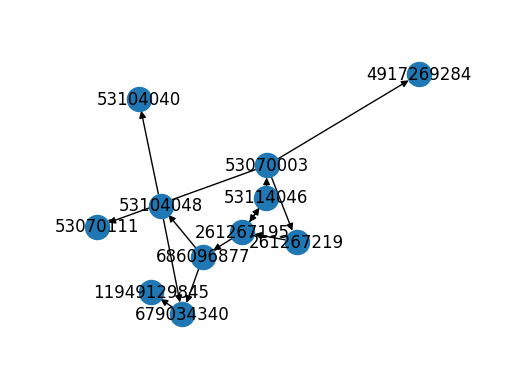

In [48]:
# picture isn't very pretty, sorry

nx.draw_networkx(drive_network)

# Set margins for the axes so nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


### Save drive network

In [49]:
filepath_drive_network = "drive_network_MAIN.graphml"

ox.save_graphml(drive_network, filepath_drive_network)

### Verify

In [50]:
saved_drive_network = ox.load_graphml(filepath_drive_network)

# Nodes (including data) coincide
drive_network.nodes(data=True) == saved_drive_network.nodes(data=True)

True

In [51]:
# Edges (including data) coincide
list(drive_network.edges(data=True)) == list(saved_drive_network.edges(data=True))

True

## Bike Network 

In [53]:
G_full_bike_network = ox.graph_from_place(alameda, network_type="bike")

f"""As of December 2024, Alameda city's bike road network has {G_full_bike_network.number_of_nodes()} nodes and {G_full_bike_network.number_of_edges()} edges"""


"As of December 2024, Alameda city's bike road network has 5198 nodes and 13605 edges"

In [61]:
# choose a random node

random.seed(42)

bike_ego_node = random.choice(list(G_full_bike_network.nodes))

bike_ego_node == 53100667

True

In [63]:
# Get the subgraph that contains the ego_node and up to 3 nodes away from it. Includes edges

bike_network = nx.ego_graph(G_full_bike_network, bike_ego_node, radius=3)

f"""This subgraph has {bike_network.number_of_nodes()} nodes and {bike_network.number_of_edges()} edges"""


'This subgraph has 13 nodes and 26 edges'

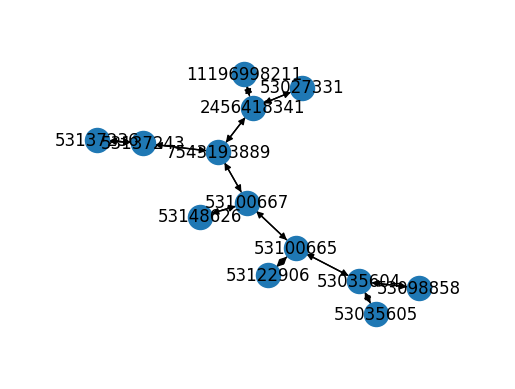

In [64]:
nx.draw_networkx(bike_network)

# Set margins for the axes so nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()


### Save bike network

In [65]:
# save bike network
filepath_bike_network = "bike_network_MAIN.graphml"
ox.save_graphml(bike_network, filepath_bike_network)

### Verify

In [66]:
saved_bike_network = ox.load_graphml(filepath_bike_network)

# Nodes (including data) coincide
bike_network.nodes(data=True) == saved_bike_network.nodes(data=True)

True

In [67]:
# Edges (including data) coincide
list(bike_network.edges(data=True)) == list(saved_bike_network.edges(data=True))

True